<a href="https://colab.research.google.com/github/trisha2321/Afame-Technologies/blob/main/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [1]:
import zipfile

# To open uploaded zip file
zip_file_path = '/content/Titanic-Dataset1.zip'

# Extract the contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Extract to the content folder

# List of  extracted files
import os
print(os.listdir('/content/'))


['.config', 'Titanic-Dataset1.csv', 'Titanic-Dataset1.zip', 'sample_data']


In [5]:
# Load the dataset
import pandas as pd

titanic_data = pd.read_csv('/content/Titanic-Dataset1.csv')

#  to verify it's loaded
print("First 5 rows of the dataset:")
print(titanic_data.head())

#  To Display information about the dataset
print("\nDataset Information:")
titanic_data.info()

# To Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(titanic_data.describe())



First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [6]:
#  To Check for missing values
print("Missing values before handling:")
print(titanic_data.isnull().sum())


Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Fill missing Age values with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column
titanic_data.drop(columns=['Cabin'], inplace=True)

# Check for missing values after handling
print("\nMissing values after handling:")
print(titanic_data.isnull().sum())



Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-7-8bb3860484e1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
<ipython-input-7-8bb3860484e1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [8]:
# Convert 'Sex' to numeric: 1 for male, 0 for female
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})

# Perform one-hot encoding for the 'Embarked' column
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Verify the changes
print("\nData after preprocessing:")
print(titanic_data.head())



Data after preprocessing:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        T

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into features (X) and target (y)
X = titanic_data.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = titanic_data['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy of the Logistic Regression model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)



Accuracy of the Logistic Regression model: 0.8100558659217877

Confusion Matrix:
[[90 15]
 [19 55]]


In [10]:


from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# To  Evaluate the model's performance
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

print("\nAccuracy of the Random Forest model:", rf_accuracy)
print("\nConfusion Matrix:")
print(rf_conf_matrix)



Accuracy of the Random Forest model: 0.8100558659217877

Confusion Matrix:
[[90 15]
 [19 55]]


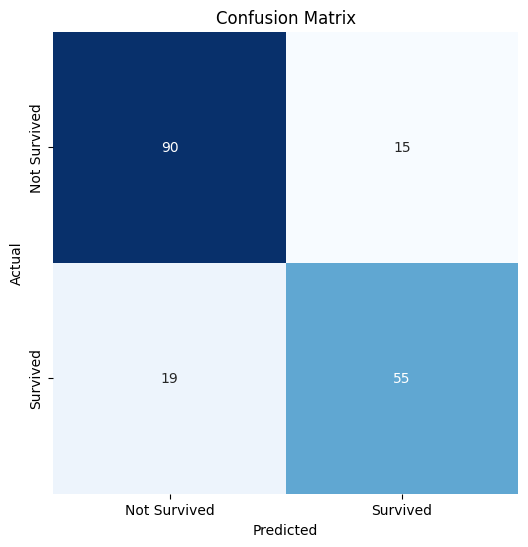

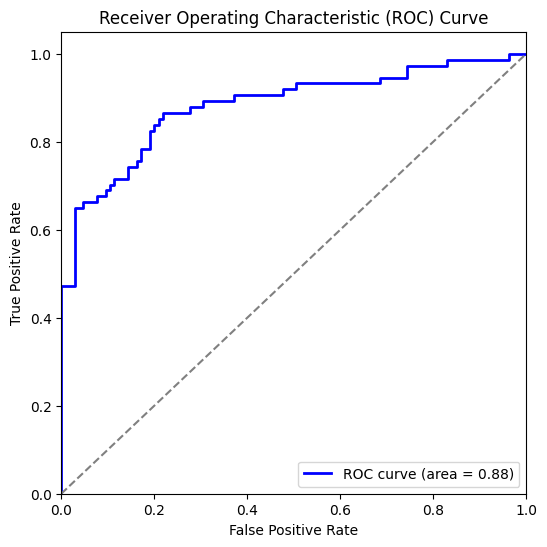

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting the  Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [12]:
import joblib

#  To Save the  model
joblib.dump(rf_model, 'titanic_survival_model.pkl')





['titanic_survival_model.pkl']